In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc
import matplotlib.colors as colors


In [2]:
plt.rc('font',size=25)
pd.set_option('max_column',200)

In [3]:
def calc_cov(mc):
    if mc.shape[0]==2 and mc.shape[1]!=2:
        mc=mc.T
    cov=np.cov(mc.T)
    return cov

In [141]:
#clip with 3sigma with cov matrix

l=[]
mx2=np.array([q.dra,q.ddec])
mx2=mx2.T
for j,x in enumerate(mx2):
    cov=calc_cov(mx2)
    if (x-mx2.mean(0)).dot(np.linalg.inv(cov)).dot(x-mx2.mean(0))<11.8:
        l.append(j)

In [142]:
q=q.iloc[l]

In [12]:
q.to_csv('../Downloads/catalog/QSO_m_S82_HSC_err_using.csv')

# quasar

In [4]:
#quasar
q=pd.read_csv('../Downloads/catalog/QSO_m_S82_HSC_err_using.csv')

# matched objects

In [5]:
#star and galaxies
m=pd.read_csv('../Downloads/catalog/m_both_all_i<24.2_ira_c_err_epoch.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,11,13,15,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
m['dra']=m.dra*1000
m['ddec']=m.ddec*1000
m['dra_err']=m.dra_err*1000
m['ddec_err']=m.ddec_err*1000

In [80]:
m.to_csv('../Downloads/catalog/m_both_all_i<24.2_ira_c_err_epoch.csv')

In [81]:
ms=m[(m.i_extendedness_value==0)&(m.type==6)]
mg=m[(m.i_extendedness_value==1)&(m.type==3)]

# stars

In [82]:
#clip stars
mx2=np.array([ms.dra,ms.ddec])
mx2=mx2.T
cov=calc_cov(mx2)
mean=mx2.mean(0)

In [83]:
t1=[]
t2=[]
le=len(mx2)/20
for i in range(20):
    t1.append(mx2[int(i*le):int((i+1)*le)])
    t2.append(ms.iloc[int(i*le):int((i+1)*le),:])

In [84]:
def clip(i):
    print(i)
    l=[]
    for j in range(len(t1[i])):
        x=t1[i][j]
        if (x-mean).dot(np.linalg.inv(cov)).dot(x-mean)<11.8:
            l.append(t2[i].index[j])
    return l

In [85]:
pool1=mp.Pool(10)
data=pool1.map(clip,range(20))
pool1.close()

4
0
1
5
3
2
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [86]:
l=[]
for i in range(20):
    l=l+data[i]

In [87]:
ms=ms.loc[l]

In [88]:
len(ms)

419736

In [30]:
ms.to_csv('../Downloads/catalog/m_both_star_i<24.2_ira_c_err_clip.csv')

In [188]:
ms=pd.read_csv('../Downloads/catalog/m_both_star_i<24.2_ira_c_err_clip.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# galaxies

In [89]:
#clip galaxies
mx2=np.array([mg.dra,mg.ddec])
mx2=mx2.T
cov=calc_cov(mx2)
mean=mx2.mean(0)

In [90]:
t1=[]
t2=[]
le=len(mx2)/20
for i in range(20):
    t1.append(mx2[int(i*le):int((i+1)*le)])
    t2.append(mg.iloc[int(i*le):int((i+1)*le),:])

In [91]:
def clip(i):
    print(i)
    l=[]
    for j in range(len(t1[i])):
        x=t1[i][j]
        if (x-mean).dot(np.linalg.inv(cov)).dot(x-mean)<11.8:
            l.append(t2[i].index[j])
    return l

In [92]:
pool1=mp.Pool(10)
data=pool1.map(clip,range(20))
pool1.close()

0
2
3
1
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [93]:
l=[]
for i in range(20):
    l=l+data[i]

In [94]:
mg=mg.loc[l]

In [95]:
len(mg)

3240244

In [96]:
mg.to_csv('../Downloads/catalog/m_both_galaxy_i<24.2_ira_c_err_clip.csv')

In [7]:
mg=pd.read_csv('../Downloads/catalog/m_both_galaxy_i<24.2_ira_c_err_clip.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,14,16,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# gaia

In [103]:
ga=pd.read_csv('../Downloads/gaia/dec126-result.csv')

In [108]:
ga=ga[(ga.ra>329)|(ga.ra<36)]

In [110]:
ga['dra']=ga.pmra*10
ga['ddec']=ga.pmdec*10

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# galaxy and quasar comparison

In [126]:
x=np.arange(-30,36,2)
y=np.arange(-1.25,1.3,0.5)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


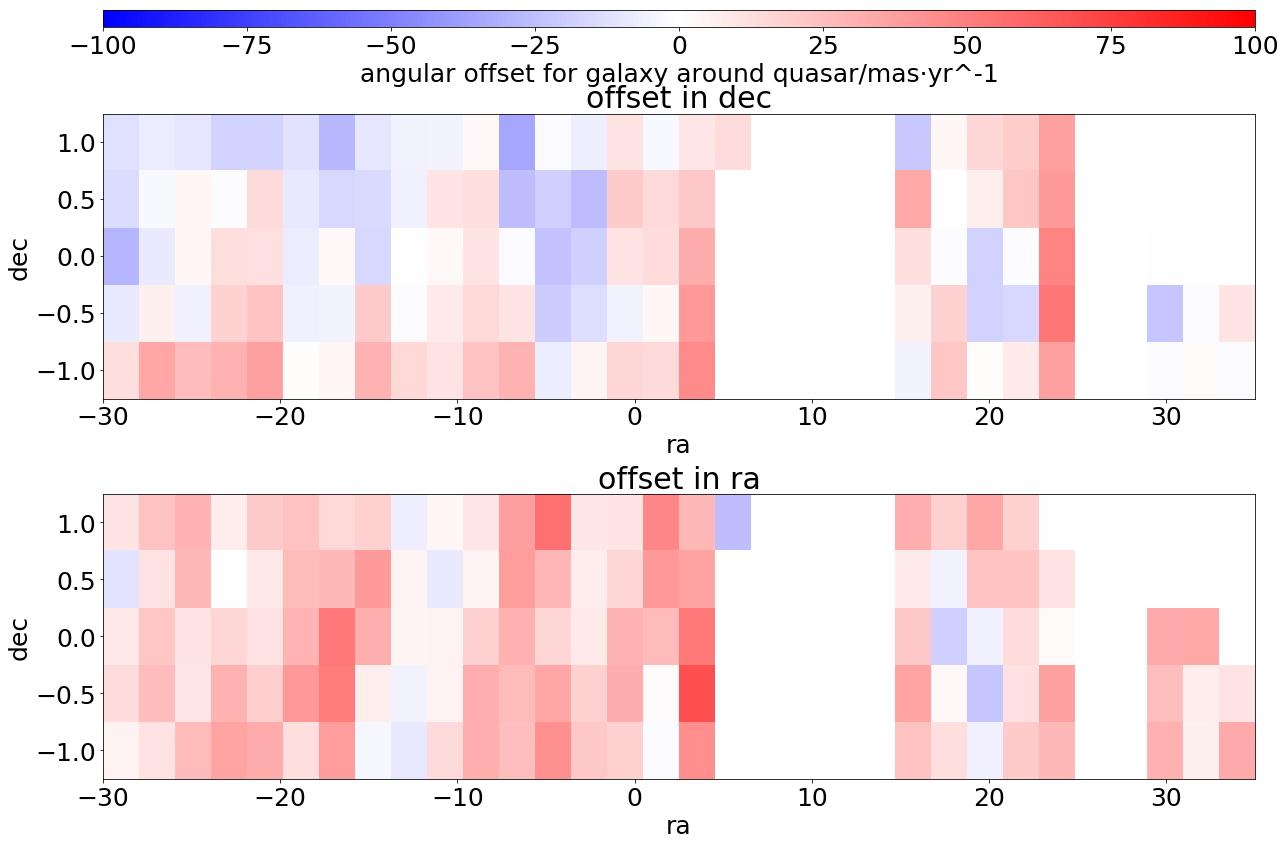

In [128]:
ra=mg.ra_2
ra[ra>180]=ra[ra>180]-360
dec=mg.dec_2
dra=mg.dra
ddec=mg.ddec
Z1=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z1[j][i]=np.mean(dra[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])
Z2=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z2[j][i]=np.mean(ddec[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])
plt.figure(figsize=(20,12))
norm = colors.Normalize(vmin=-100, vmax=100)
plt.axes([0.1,0.08,0.8,0.33])
plt.imshow(Z1, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in ra')
plt.axes([0.1,0.52,0.8,0.33])
plt.imshow(Z2, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in dec')
plt.colorbar(orientation='horizontal',label='angular offset for galaxy around quasar/mas·yr^-1',cax = plt.axes([0.1, 0.95, 0.8, 0.02]))
#plt.savefig('/Users/tianqiu/Downloads/calibration/pm_ra_dec_dependence_2d_g_2.png')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


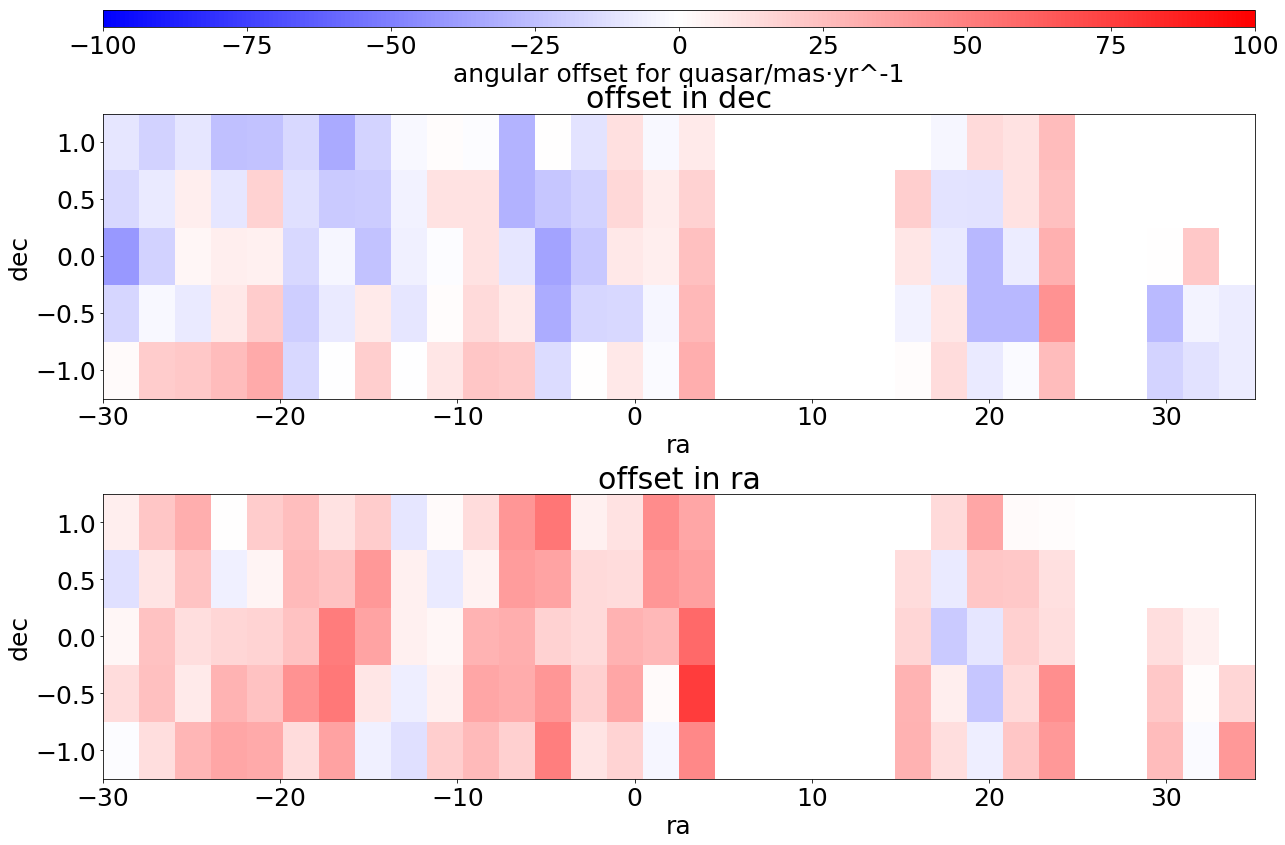

In [130]:
ra2=q.ra_2
ra2[ra2>180]=ra2[ra2>180]-360
dec2=q.dec_2
dra2=q.dra
ddec2=q.ddec
Z12=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z12[j][i]=np.mean(dra2[(ra2<x[i+1])&(ra2>x[i])&(dec2>y[j])&(dec2<y[j+1])])
Z22=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z22[j][i]=np.mean(ddec2[(ra2<x[i+1])&(ra2>x[i])&(dec2>y[j])&(dec2<y[j+1])])
plt.figure(figsize=(20,12))
norm = colors.Normalize(vmin=-100, vmax=100)
plt.axes([0.1,0.08,0.8,0.33])
plt.imshow(Z12, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in ra')
plt.axes([0.1,0.52,0.8,0.33])
plt.imshow(Z22, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in dec')
plt.colorbar(orientation='horizontal',label='angular offset for quasar/mas·yr^-1',cax = plt.axes([0.1, 0.95, 0.8, 0.02]))
#plt.savefig('/Users/tianqiu/Downloads/calibration/pm_ra_dec_dependence_2d_q_2.png')

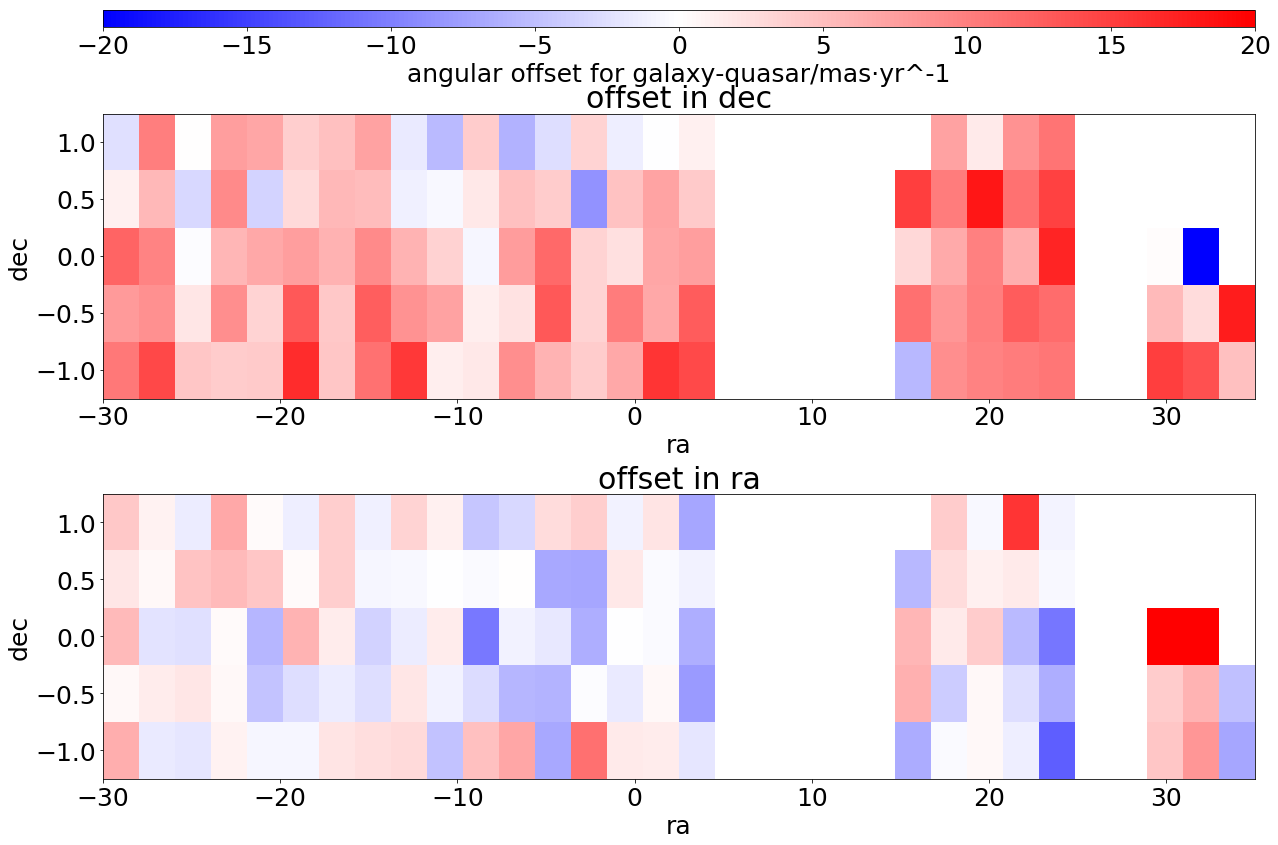

In [133]:
Z13=Z1-Z12
Z23=Z2-Z22
plt.figure(figsize=(20,12))
norm = colors.Normalize(vmin=-20, vmax=20)
plt.axes([0.1,0.08,0.8,0.33])
plt.imshow(Z13, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in ra')
plt.axes([0.1,0.52,0.8,0.33])
plt.imshow(Z23, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in dec')
plt.colorbar(orientation='horizontal',label='angular offset for galaxy-quasar/mas·yr^-1',cax = plt.axes([0.1, 0.95, 0.8, 0.02]))
#plt.savefig('/Users/tianqiu/Downloads/calibration/pm_ra_dec_dependence_2d_r_2.png')

# calibration by quasar

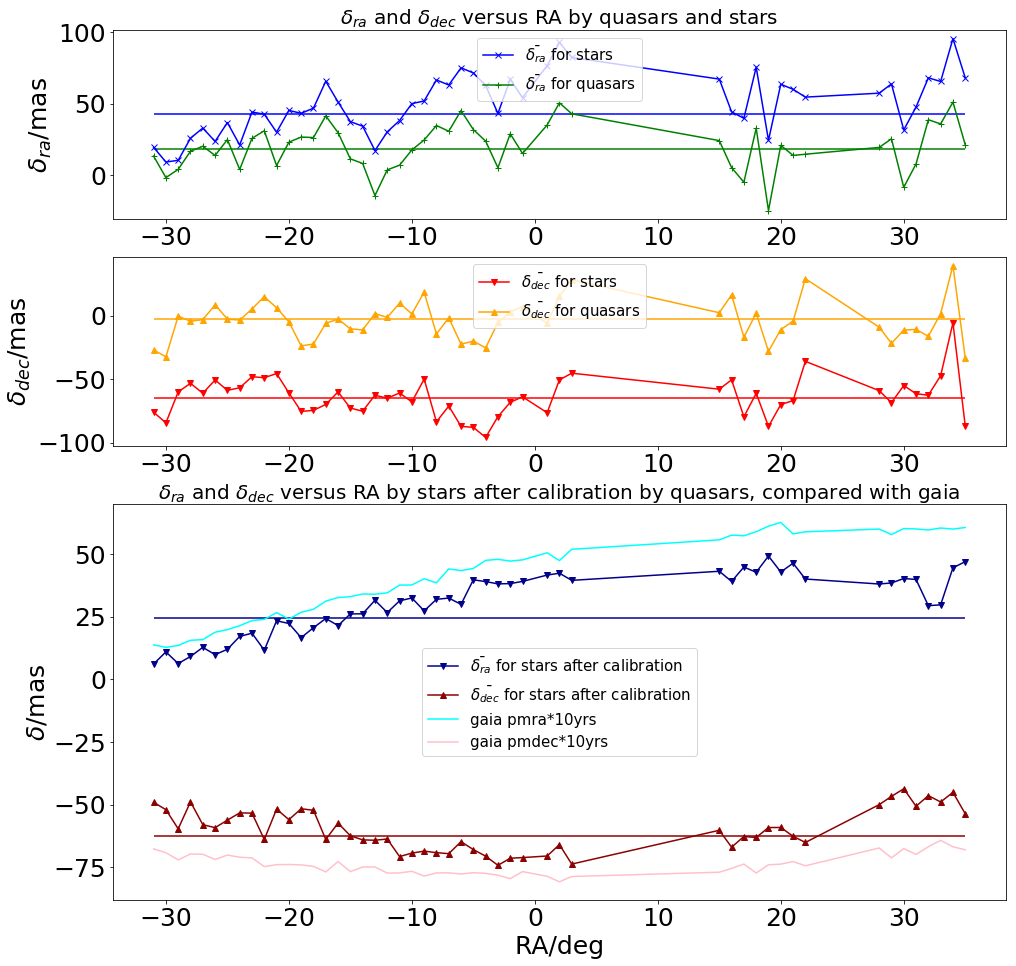

In [119]:
xm=[]
ram=[]
decm=[]
ram2=[]
decm2=[]
ram3=[]
decm3=[]
#rae=[]
#dece=[]
#rae2=[]
#dece2=[]
        
for j in range(360):
    i=180+j
    if i >360:
        i=i-360    
    t1=ms[(ms.ra_2>i)&(ms.ra_2<=(1+i))]
    t2=q[(q.ra_2>i)&(q.ra_2<=(i+1))]
    t3=ga[(ga.ra>i)&(ga.ra<=(i+1))]
    if t2.empty:
        continue
    if i >180:
        xm.append(i-360)
    else:
        xm.append(i)
    
    ram.append(np.mean(t1.dra))
    decm.append(np.mean(t1.ddec))
    ram2.append(np.mean(t2.dra))
    decm2.append(np.mean(t2.ddec))
    ram3.append(np.mean(t3.dra))
    decm3.append(np.mean(t3.ddec))
#    rae.append(stats.sem(t1.dra))
#    dece.append(stats.sem(t1.ddec))
#    rae2.append(stats.sem(t2.dra))
#    dece2.append(stats.sem(t2.ddec))
plt.figure(figsize=(16,16))
plt.subplot(4,1,1)
plt.title(r'$\delta_{ra}$ and $\delta_{dec}$ versus RA by quasars and stars',fontsize=20)
plt.hlines(np.mean(ms.dra),np.min(xm),np.max(xm),color='blue')
plt.hlines(np.mean(q.dra),np.min(xm),np.max(xm),color='green')
plt.plot(xm,ram,color='blue',marker='x',label=r'$\bar{\delta_{ra}}$ for stars')
plt.plot(xm,ram2,color='green',marker='+',label=r'$\bar{\delta_{ra}}$ for quasars')
#plt.errorbar(xm,ram,yerr=rae,fmt='-',capsize=2,color='blue')
#plt.errorbar(xm,ram2,yerr=rae2,fmt='-',capsize=2,color='green')
plt.legend(loc=9,fontsize=15)
plt.ylabel('$\delta_{ra}$/mas')

plt.subplot(4,1,2)
plt.hlines(np.mean(ms.ddec),np.min(xm),np.max(xm),color='red')
plt.hlines(np.mean(q.ddec),np.min(xm),np.max(xm),color='orange')
plt.plot(xm,decm,color='red',marker='v',label=r'$\bar{\delta_{dec}}$ for stars')
plt.plot(xm,decm2,color='orange',marker='^',label=r'$\bar{\delta_{dec}}$ for quasars')
#plt.errorbar(xm,decm,yerr=dece,fmt='-',capsize=2,color='red')
#plt.errorbar(xm,decm2,yerr=dece2,fmt='-',capsize=2,color='orange')
plt.legend(loc=9,fontsize=15)
plt.ylabel('$\delta_{dec}$/mas')

plt.subplot(2,1,2)
plt.title(r'$\delta_{ra}$ and $\delta_{dec}$ versus RA by stars after calibration by quasars, compared with gaia',fontsize=20)
plt.hlines(np.mean(ms.dra)-np.mean(q.dra),np.min(xm),np.max(xm),color='darkblue')
plt.hlines(np.mean(ms.ddec)-np.mean(q.ddec),np.min(xm),np.max(xm),color='darkred')
plt.plot(xm,np.array(ram)-np.array(ram2),color='darkblue',marker='v',label=r'$\bar{\delta_{ra}}$ for stars after calibration')
plt.plot(xm,np.array(decm)-np.array(decm2),color='darkred',marker='^',label=r'$\bar{\delta_{dec}}$ for stars after calibration')
plt.plot(xm,ram3,color='cyan',label=r'gaia pmra*10yrs')
plt.plot(xm,decm3,color='pink',label=r'gaia pmdec*10yrs')
plt.legend(loc=10,fontsize=15)
plt.xlabel('RA/deg')
plt.ylabel('$\delta$/mas')
plt.savefig('/Users/tianqiu/Downloads/calibration/star_pm-quasar_calibration_gaia.png')

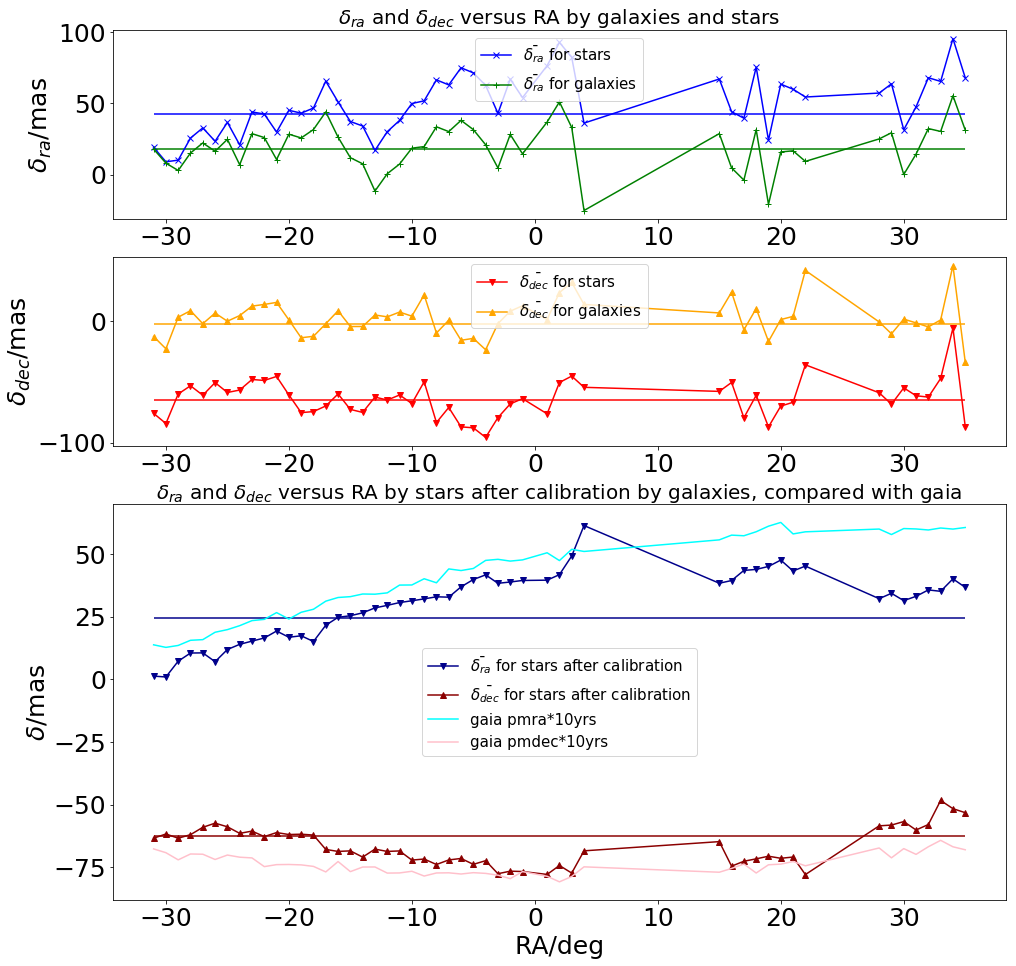

In [120]:
xm=[]
ram=[]
decm=[]
ram2=[]
decm2=[]
ram3=[]
decm3=[]
#rae=[]
#dece=[]
#rae2=[]
#dece2=[]
        
for j in range(360):
    i=180+j
    if i >360:
        i=i-360    
    t1=ms[(ms.i_sdsscentroid_ra>i)&(ms.i_sdsscentroid_ra<=(1+i))]
    t2=mg[(mg.i_sdsscentroid_ra>i)&(mg.i_sdsscentroid_ra<=(i+1))]
    t3=ga[(ga.ra>i)&(ga.ra<=(i+1))]
    if t2.empty:
        continue
    if i >180:
        xm.append(i-360)
    else:
        xm.append(i)
    
    ram.append(np.mean(t1.dra))
    decm.append(np.mean(t1.ddec))
    ram2.append(np.mean(t2.dra))
    decm2.append(np.mean(t2.ddec))
    ram3.append(np.mean(t3.dra))
    decm3.append(np.mean(t3.ddec))
#    rae.append(stats.sem(t1.dra))
#    dece.append(stats.sem(t1.ddec))
#    rae2.append(stats.sem(t2.dra))
#    dece2.append(stats.sem(t2.ddec))
plt.figure(figsize=(16,16))
plt.subplot(4,1,1)
plt.title(r'$\delta_{ra}$ and $\delta_{dec}$ versus RA by galaxies and stars',fontsize=20)
plt.hlines(np.mean(ms.dra),np.min(xm),np.max(xm),color='blue')
plt.hlines(np.mean(q.dra),np.min(xm),np.max(xm),color='green')
plt.plot(xm,ram,color='blue',marker='x',label=r'$\bar{\delta_{ra}}$ for stars')
plt.plot(xm,ram2,color='green',marker='+',label=r'$\bar{\delta_{ra}}$ for galaxies')
#plt.errorbar(xm,ram,yerr=rae,fmt='-',capsize=2,color='blue')
#plt.errorbar(xm,ram2,yerr=rae2,fmt='-',capsize=2,color='green')
plt.legend(loc=9,fontsize=15)
plt.ylabel('$\delta_{ra}$/mas')

plt.subplot(4,1,2)
plt.hlines(np.mean(ms.ddec),np.min(xm),np.max(xm),color='red')
plt.hlines(np.mean(q.ddec),np.min(xm),np.max(xm),color='orange')
plt.plot(xm,decm,color='red',marker='v',label=r'$\bar{\delta_{dec}}$ for stars')
plt.plot(xm,decm2,color='orange',marker='^',label=r'$\bar{\delta_{dec}}$ for galaxies')
#plt.errorbar(xm,decm,yerr=dece,fmt='-',capsize=2,color='red')
#plt.errorbar(xm,decm2,yerr=dece2,fmt='-',capsize=2,color='orange')
plt.legend(loc=9,fontsize=15)
plt.ylabel('$\delta_{dec}$/mas')

plt.subplot(2,1,2)
plt.title(r'$\delta_{ra}$ and $\delta_{dec}$ versus RA by stars after calibration by galaxies, compared with gaia',fontsize=20)
plt.hlines(np.mean(ms.dra)-np.mean(q.dra),np.min(xm),np.max(xm),color='darkblue')
plt.hlines(np.mean(ms.ddec)-np.mean(q.ddec),np.min(xm),np.max(xm),color='darkred')
plt.plot(xm,np.array(ram)-np.array(ram2),color='darkblue',marker='v',label=r'$\bar{\delta_{ra}}$ for stars after calibration')
plt.plot(xm,np.array(decm)-np.array(decm2),color='darkred',marker='^',label=r'$\bar{\delta_{dec}}$ for stars after calibration')
plt.plot(xm,ram3,color='cyan',label=r'gaia pmra*10yrs')
plt.plot(xm,decm3,color='pink',label=r'gaia pmdec*10yrs')
plt.legend(loc=10,fontsize=15)
plt.xlabel('RA/deg')
plt.ylabel('$\delta$/mas')
plt.savefig('/Users/tianqiu/Downloads/calibration/star_pm-galaxy_calibration_gaia.png')

## calibrate every star's offset by grids made from galaxies' offset.

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


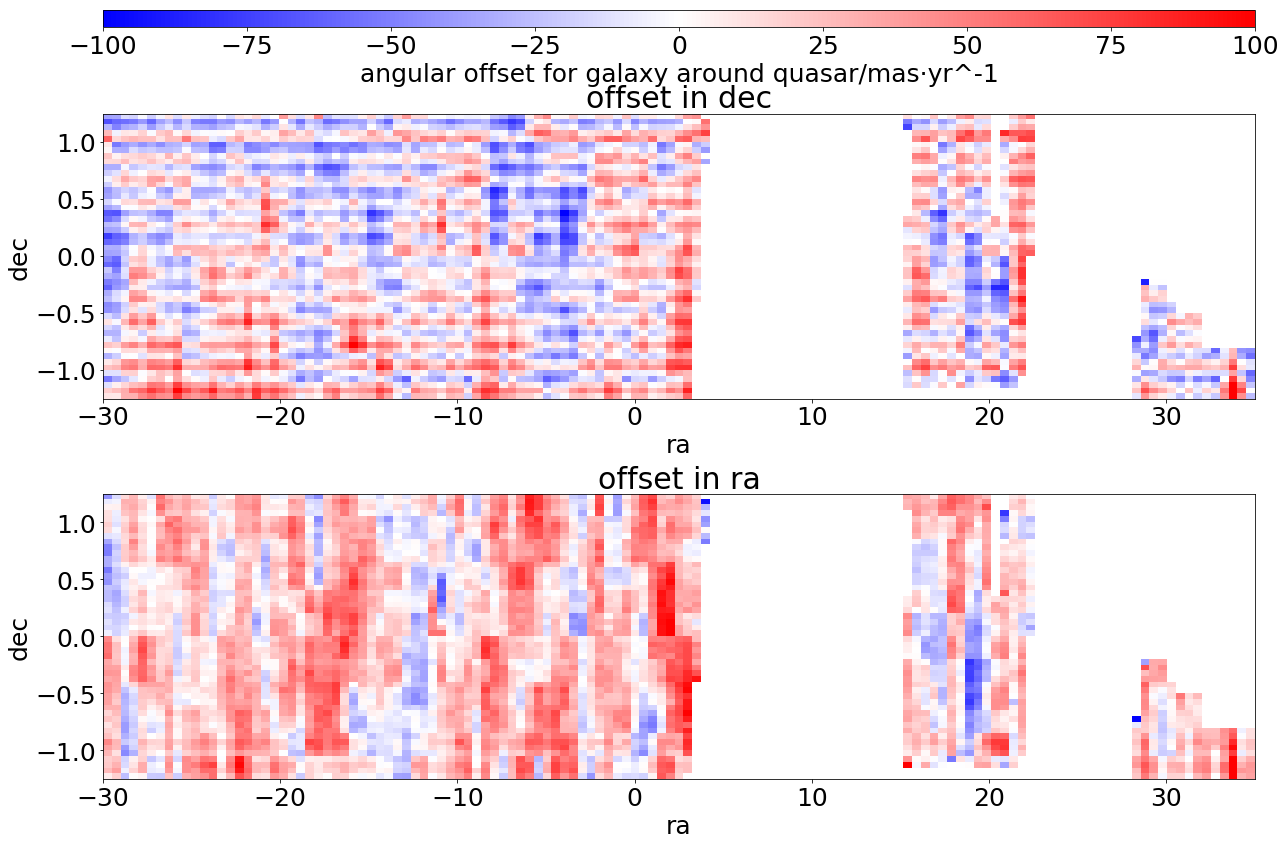

In [134]:
x=np.arange(-30,36,0.5)
y=np.arange(-1.25,1.3,0.05)
ra=mg.ra_2
ra[ra>180]=ra[ra>180]-360
dec=mg.dec_2
dra=mg.dra
ddec=mg.ddec
Z1=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z1[j][i]=np.mean(dra[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])
Z2=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z2[j][i]=np.mean(ddec[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])
plt.figure(figsize=(20,12))
norm = colors.Normalize(vmin=-100, vmax=100)
plt.axes([0.1,0.08,0.8,0.33])
plt.imshow(Z1, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in ra')
plt.axes([0.1,0.52,0.8,0.33])
plt.imshow(Z2, norm=norm, origin='lower', extent=[-30, 35, -1.25, 1.25],cmap='bwr',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in dec')
plt.colorbar(orientation='horizontal',label='angular offset for galaxies/mas·yr^-1',cax = plt.axes([0.1, 0.95, 0.8, 0.02]))
#plt.savefig('/Users/tianqiu/Downloads/calibration/pm_ra_dec_dependence_2d_g_2.png')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


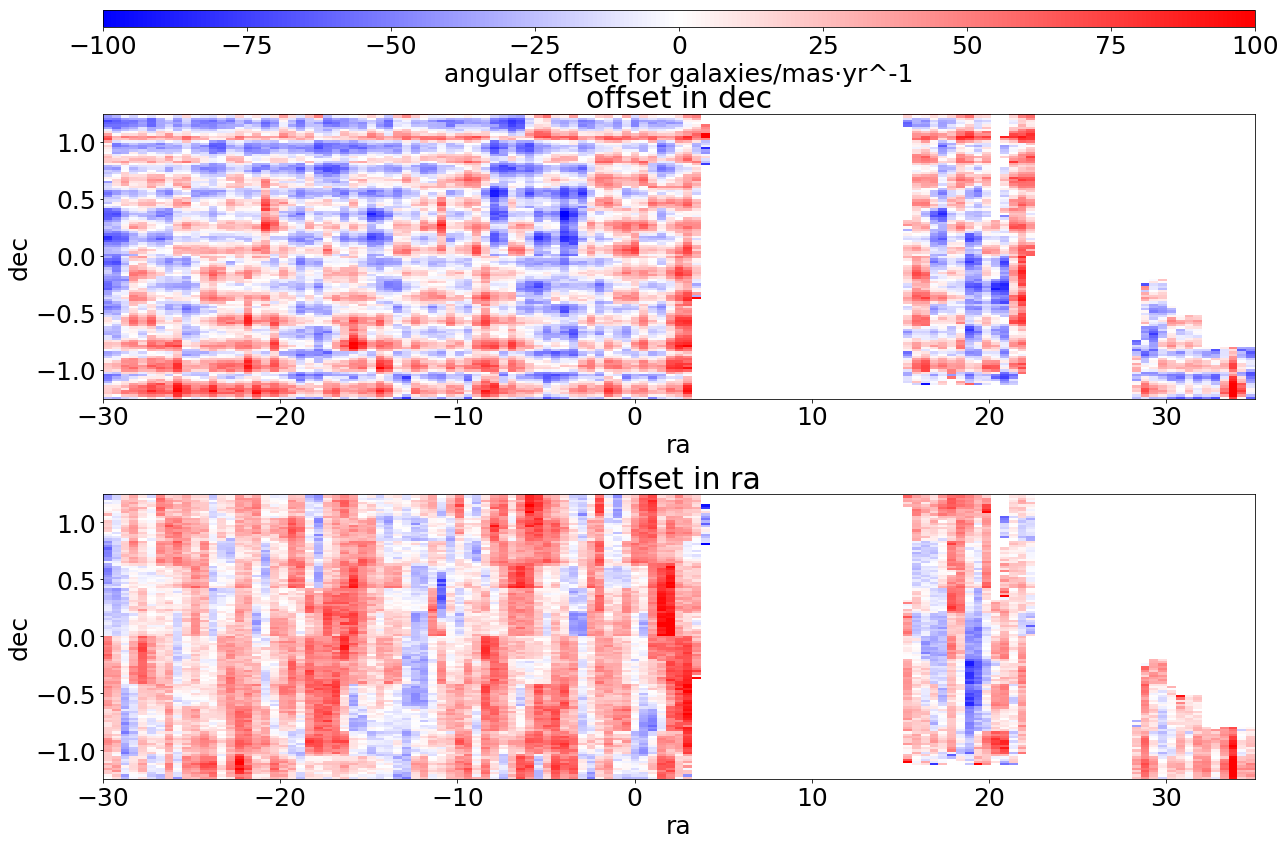

In [136]:
x=np.arange(-30,36,0.5)
y=np.arange(-1.26,1.28,0.02)
ra=mg.ra_2
ra[ra>180]=ra[ra>180]-360
dec=mg.dec_2
dra=mg.dra
ddec=mg.ddec
Z11=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z11[j][i]=np.mean(dra[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])
Z22=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z22[j][i]=np.mean(ddec[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])


In [139]:
Z11

array([[ -0.21256051,  12.60971642, -27.66693695, ...,  95.69040948,
         19.03446249,  26.64102811],
       [  3.62625006,  23.89425169, -39.77578366, ..., 108.06721121,
         32.10787051,  44.08574246],
       [ 20.7319007 ,  14.53417702,  -5.87689456, ..., 109.14595258,
         36.50868406,  37.0149787 ],
       ...,
       [-34.73304764, -16.35228269,  16.06141181, ...,          nan,
                 nan,          nan],
       [-37.48749314, -17.14095352,  16.04360479, ...,          nan,
                 nan,          nan],
       [-51.23653893,  -2.42562979,   4.77074283, ...,          nan,
                 nan,          nan]])

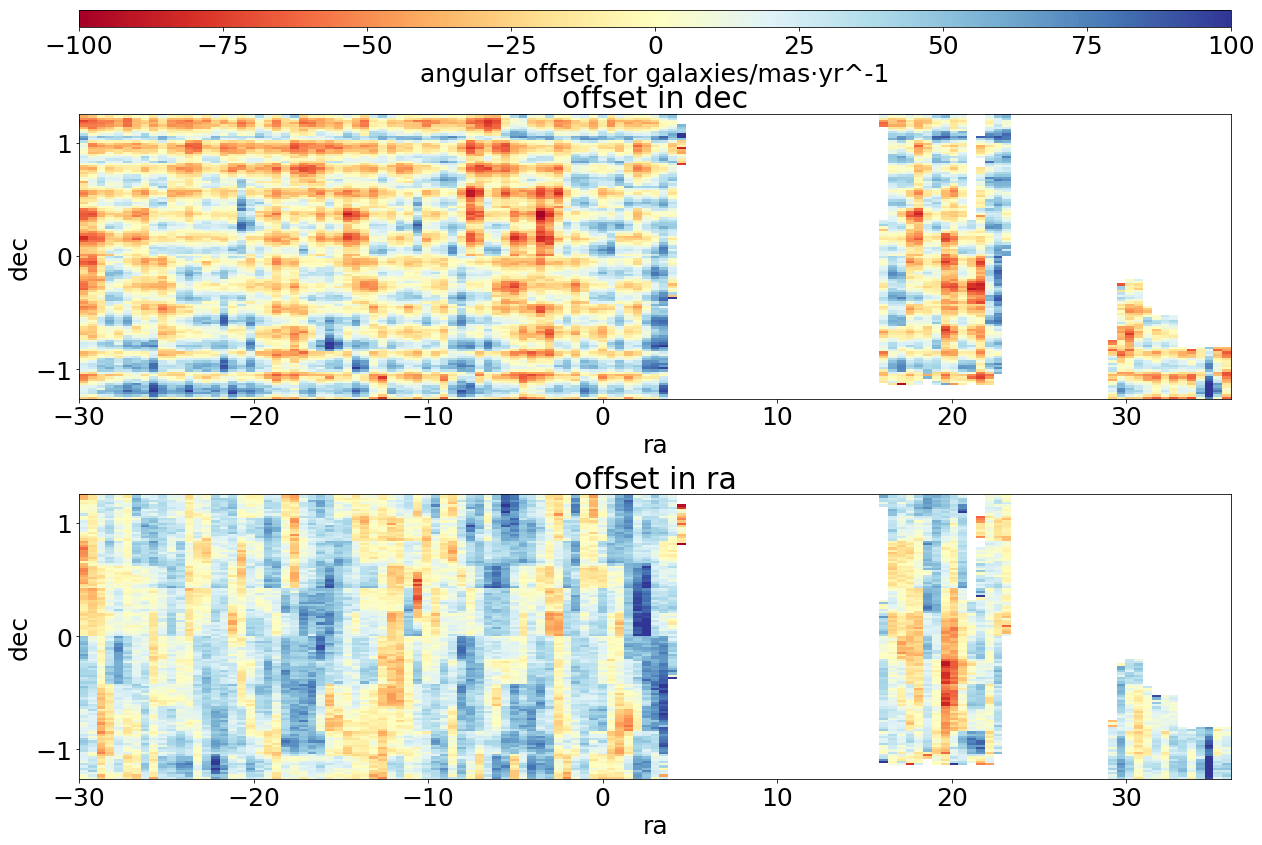

In [138]:
plt.figure(figsize=(20,12))
norm = colors.Normalize(vmin=-100, vmax=100)
plt.axes([0.1,0.08,0.8,0.33])
plt.imshow(Z11, norm=norm, origin='lower', extent=[-30, 36, -1.26, 1.26],cmap='RdYlBu',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in ra')
plt.axes([0.1,0.52,0.8,0.33])
plt.imshow(Z22, norm=norm, origin='lower', extent=[-30, 36, -1.26, 1.26],cmap='RdYlBu',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in dec')
plt.colorbar(orientation='horizontal',label='angular offset for galaxies/mas·yr^-1',cax = plt.axes([0.1, 0.95, 0.8, 0.02]))
#plt.savefig('/Users/tianqiu/Downloads/calibration/pm_ra_dec_dependence_2d_g_2.png')

In [173]:
np.min(mg.ra_2)

-30.51241273475398

In [141]:
x=np.arange(-30,36,0.1)#660
y=np.arange(-1.26,1.27,0.02)#126
ra=mg.ra_2
ra[ra>180]=ra[ra>180]-360
dec=mg.dec_2
dra=mg.dra
ddec=mg.ddec
Z111=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z111[j][i]=np.mean(dra[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])
Z222=np.zeros((len(y)-1,len(x)-1))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        Z222[j][i]=np.mean(ddec[(ra<x[i+1])&(ra>x[i])&(dec>y[j])&(dec<y[j+1])])


/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


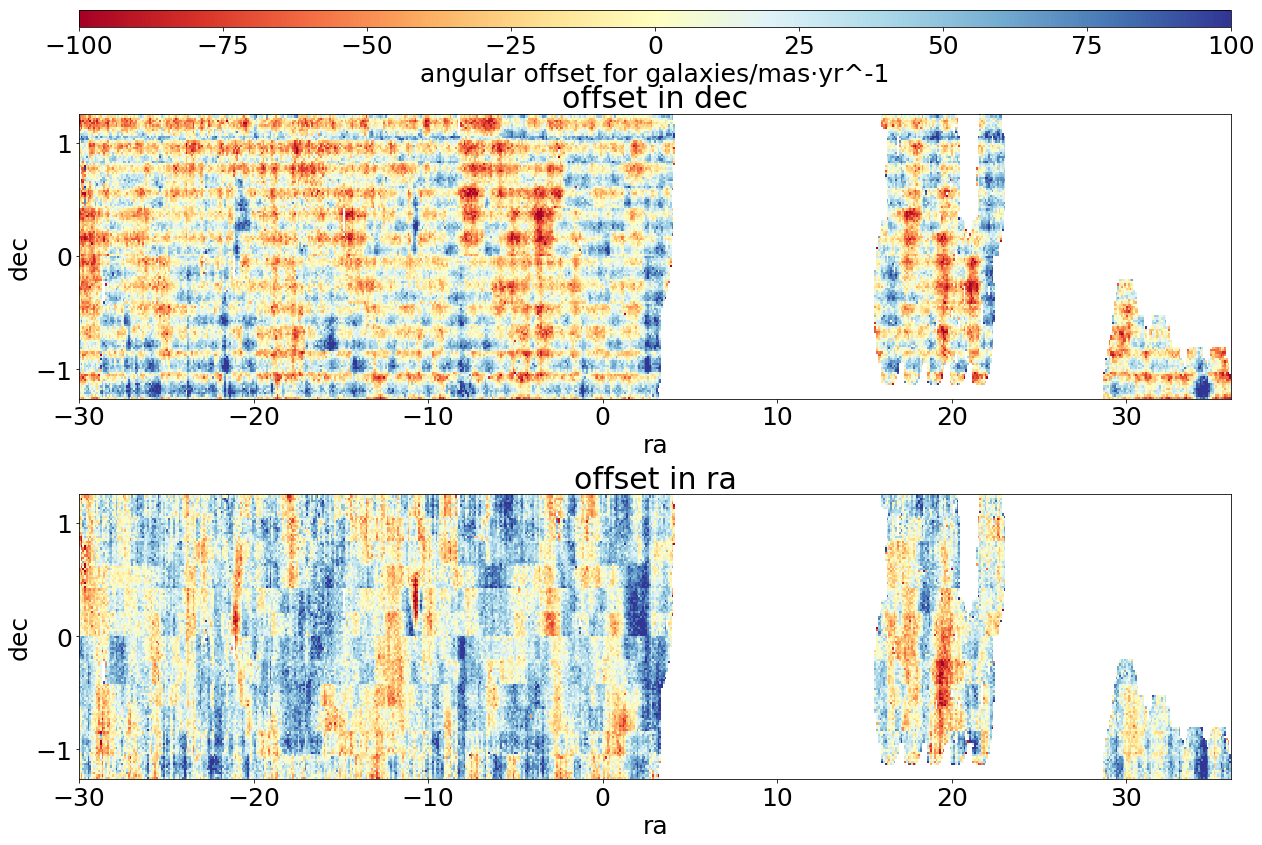

In [148]:
plt.figure(figsize=(20,12))
norm = colors.Normalize(vmin=-100, vmax=100)
plt.axes([0.1,0.08,0.8,0.33])
plt.imshow(Z111, norm=norm, origin='lower', extent=[-30, 36, -1.26, 1.26],cmap='RdYlBu',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in ra')
plt.axes([0.1,0.52,0.8,0.33])
plt.imshow(Z222, norm=norm, origin='lower', extent=[-30, 36, -1.26, 1.26],cmap='RdYlBu',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in dec')
plt.colorbar(orientation='horizontal',label='angular offset for galaxies/mas·yr^-1',cax = plt.axes([0.1, 0.95, 0.8, 0.02]))
plt.savefig('/Users/tianqiu/Downloads/calibration/delta_ra_dec_dependence_2d_g.png')

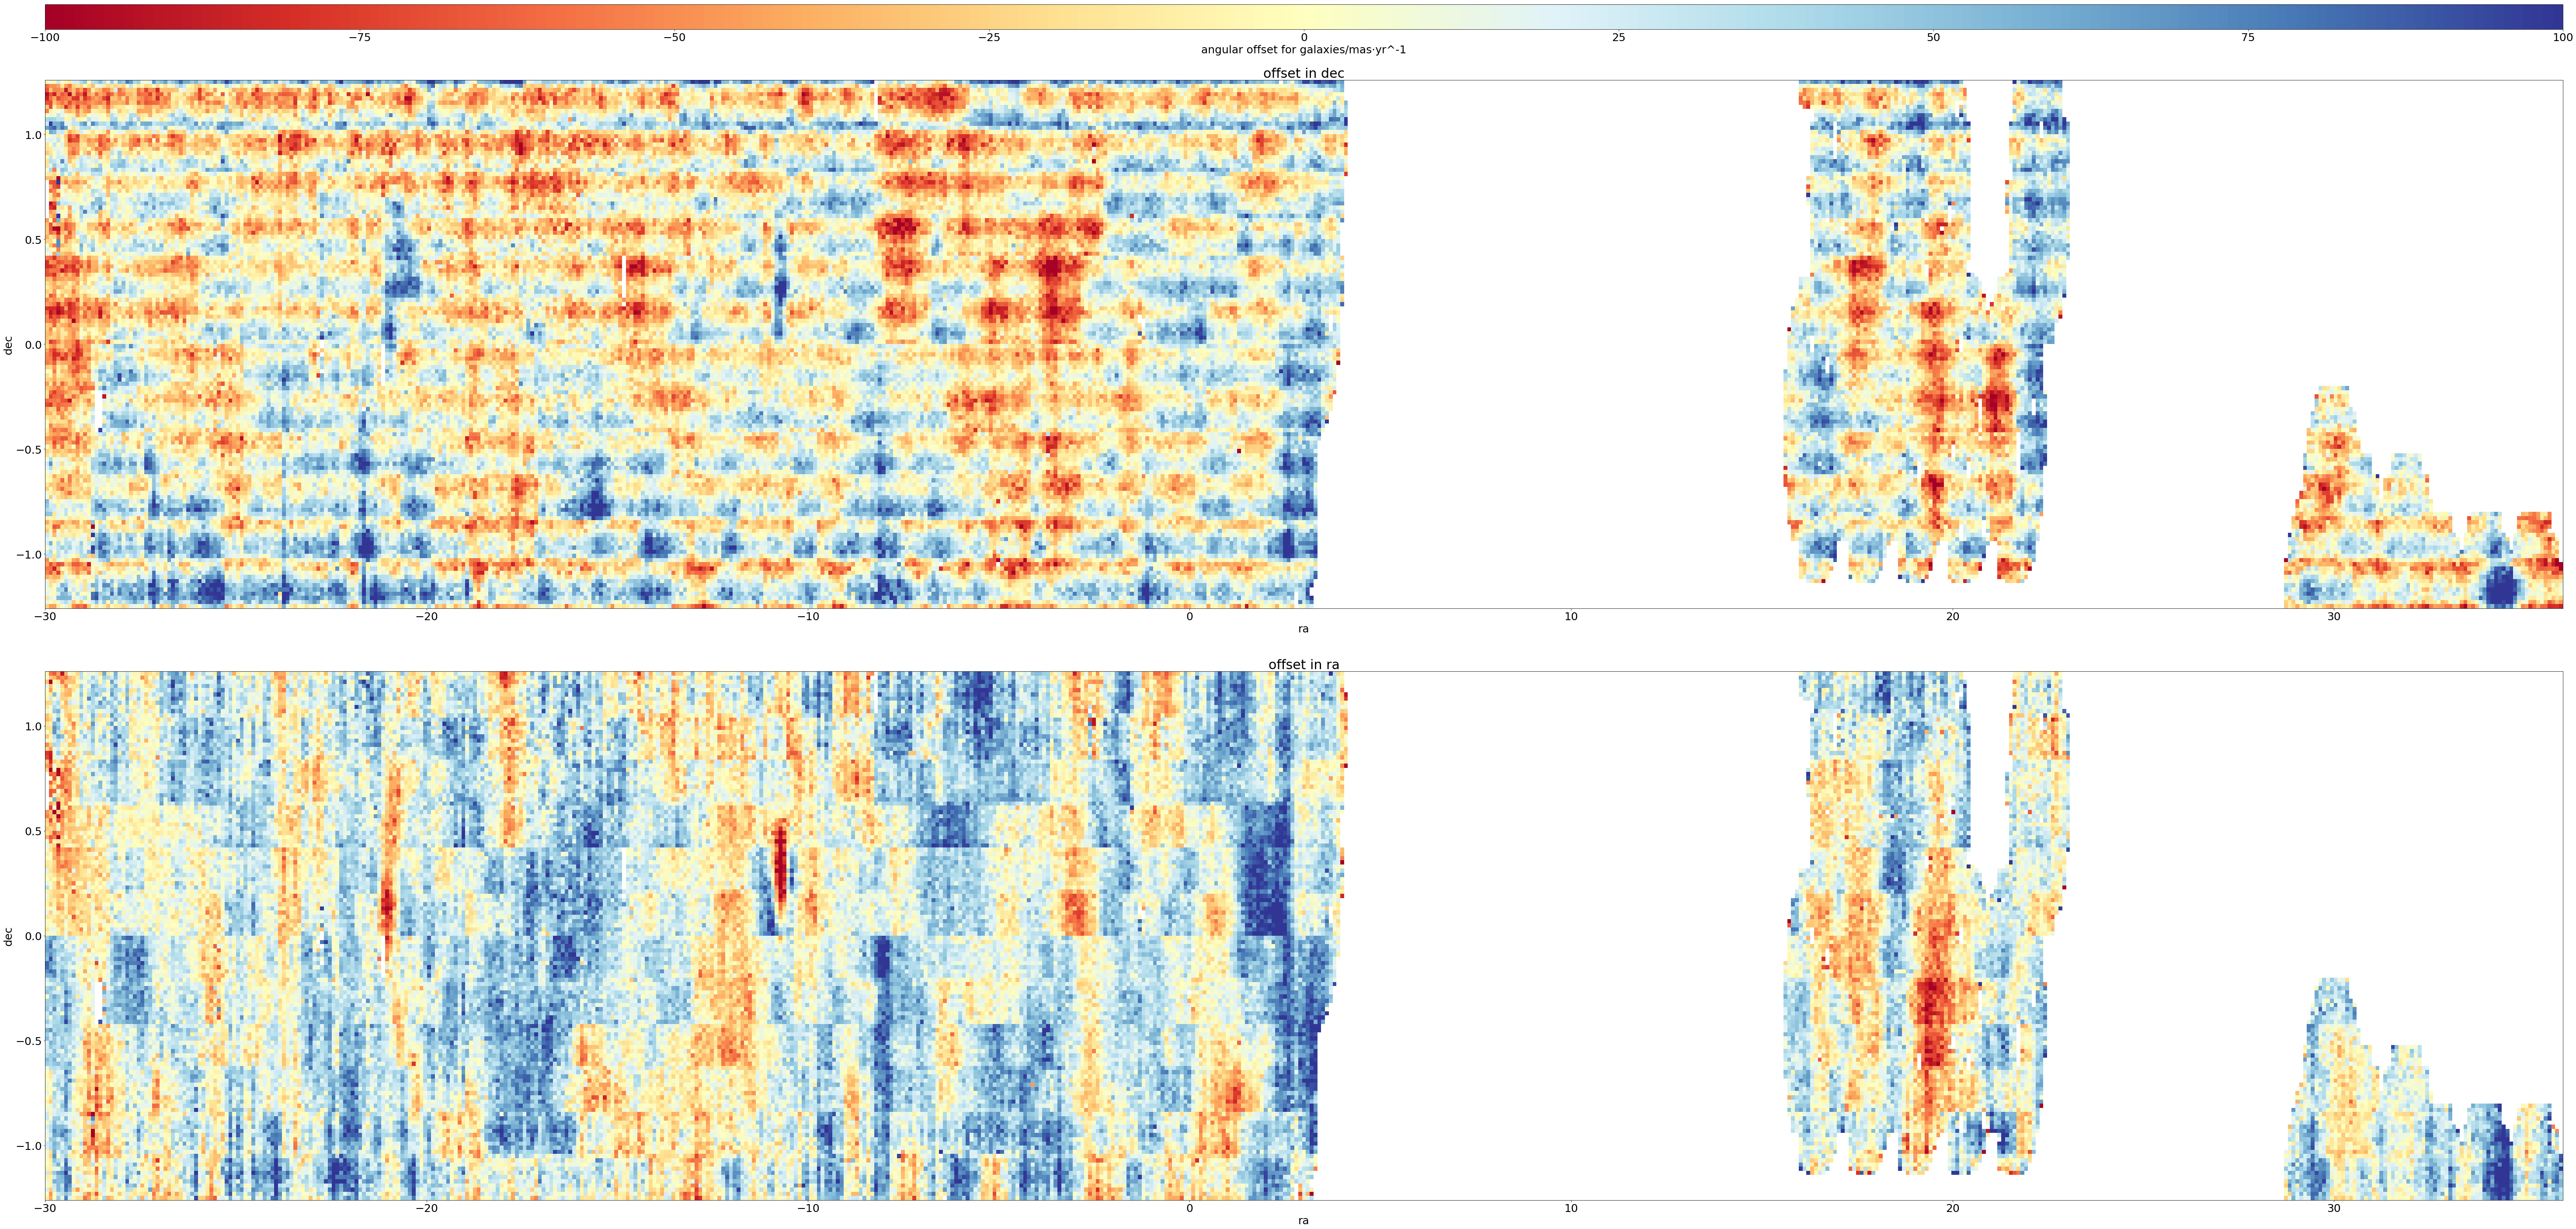

In [149]:
plt.figure(figsize=(100,40))
norm = colors.Normalize(vmin=-100, vmax=100)
plt.axes([0.1,0.02,0.8,0.42])
plt.imshow(Z111, norm=norm, origin='lower', extent=[-30, 36, -1.26, 1.26],cmap='RdYlBu',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in ra')
plt.axes([0.1,0.49,0.8,0.42])
plt.imshow(Z222, norm=norm, origin='lower', extent=[-30, 36, -1.26, 1.26],cmap='RdYlBu',aspect='auto')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('offset in dec')
plt.colorbar(orientation='horizontal',label='angular offset for galaxies/mas·yr^-1',cax = plt.axes([0.1, 0.95, 0.8, 0.02]))
plt.savefig('/Users/tianqiu/Downloads/calibration/delta_ra_dec_dependence_2d_g_hr.png')

## dataframe for calibration

In [186]:
np.max(mg.ra_2)

35.9153554118456

In [187]:
np.max(ms.ra_2)

359.999946503683

In [157]:
ca=pd.DataFrame(data=Z111)

In [174]:
co=[]
for i in range(len(x)-1):
    co.append(str(np.around(x[i], decimals=1)))

In [176]:
ca.columns=[co]

In [179]:
ca.insert(0,'dec',y[0:-1])

In [182]:
ca.to_csv('../Downloads/catalog/calibration_galaxy_dra.csv')

In [183]:
cd=pd.DataFrame(data=Z222)
cd.columns=[co]
cd.insert(0,'dec',y[0:-1])

In [185]:
cd.to_csv('../Downloads/catalog/calibration_galaxy_ddec.csv')